# Breast cancer classification 

Aim of this analysis is to predict which tumors can be malignant. Used methods are prinicipal component analysis and dimensionality reduction to check for the feature meaningfulness in tumor malignancy prediction. 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

Wisconsin Breast Cancer Data
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2

In [14]:
# Loading the data (relative path in Kaggle)
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

First, we visualise the data and check for type of features.

In [15]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Checking for unique values in diagnosis column.

In [16]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In diagnosis columns, only values are 'M' and 'B' for malignant and beningn. We are not changing it to binary format of 0 and 1 as for this kind of analysis it is not needed. 

# Preprocessing

Getting rid of last column that have NaN values. 

In [17]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [18]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Since our goal is to predict diagnosis, we set 'y' as diagnosis and all the other data as 'X'. We are splitting train and test data: 70% for training and 30% for testing. Random split is set to '123' and used to do random split of the data and it ensures reproducibility.

In [19]:
y = data['diagnosis'].copy()
X = data.drop('diagnosis', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [21]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.12980,0.2517,0.36300,0.09653,0.2112,0.08732
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.38890,0.19840,0.3216,0.07570
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.11570,0.1350,0.08115,0.05104,0.2364,0.07182
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.19220,0.08449,0.2772,0.08756
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.2231,0.17910,0.11550,0.2382,0.08553
382,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735


In the 'X- train' data samples values present big variance, so data may need standardization. In Principal Component Analysis, standard scaler is used, which is a method of standardization in machine learning which generates data with a mean = 0 and standard deviation = 1. It allows all the features to be in similar scale. Both X_train and X_test are standardised in the same way, using standarisation from X-train to prevent information leakage (which is the situation when a test dataset unintentionally influences the training process) and for consistency and generalisation abillity. 

In [24]:
# Scanning a dataset for how much of the standardization do the samples need
scaler = StandardScaler()
scaler.fit(X_train)

# Standardizing the dataset with transform method and assigned to Dataframe
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [27]:
# We can see that the mean values after standardization are indeed very close to 0.
X_train.mean()

radius_mean                8.368515e-19
texture_mean              -1.115802e-18
perimeter_mean             7.810614e-18
area_mean                  3.347406e-18
smoothness_mean           -2.454764e-17
compactness_mean          -2.154893e-17
concavity_mean             9.623793e-18
concave points_mean        1.087907e-17
symmetry_mean             -2.677925e-17
fractal_dimension_mean    -1.283172e-17
radius_se                  6.415862e-18
texture_se                 1.673703e-18
perimeter_se              -6.387967e-17
area_se                   -2.984770e-17
smoothness_se              1.516793e-18
compactness_se            -9.484317e-18
concavity_se              -4.742159e-18
concave points_se          2.036339e-17
symmetry_se                5.927698e-18
fractal_dimension_se       1.450543e-17
radius_worst              -3.654252e-17
texture_worst              2.566345e-17
perimeter_worst           -5.857961e-18
area_worst                 1.868968e-17
smoothness_worst           1.896863e-17


In [25]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.754501,1.016591,-0.731287,-0.732655,-0.244628,-0.046204,0.276113,-0.209613,-1.463648,0.393141,...,-0.786560,1.835601,-0.748038,-0.715894,-0.048296,0.013325,0.464941,-0.272555,-1.224122,0.246375
1,-0.107318,-1.377551,-0.167357,-0.212302,-0.290236,-0.806690,-0.982285,-0.780715,-0.758709,-0.498156,...,-0.330400,-1.399872,-0.391399,-0.384622,-0.624296,-0.968536,-1.127291,-0.871529,-0.081993,-0.899752
2,0.872048,0.598852,0.813064,0.791235,0.092006,-0.277838,0.018477,0.422567,0.191577,-0.947868,...,1.108900,0.583315,0.998261,0.988855,1.121705,0.047299,0.591565,1.311903,0.549310,-0.440828
3,-0.084408,-0.492662,-0.151531,-0.194880,-0.589225,-0.822895,-0.937614,-0.983264,-0.682686,-0.527956,...,-0.159600,-0.336308,-0.207531,-0.269767,-0.682796,-0.779638,-0.913008,-0.980094,-0.819317,-0.670290
4,1.436186,1.616250,1.421142,1.400153,0.435156,0.777386,1.288387,1.241373,0.312522,-0.080953,...,1.554646,1.634084,1.577161,1.499322,2.129706,0.912967,1.503354,1.137701,0.616777,0.830675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.728728,-1.474125,-0.738784,-0.706231,-0.445884,-0.558088,-0.590263,-0.406680,-0.661953,0.409395,...,-0.665750,-1.363087,-0.727641,-0.648009,0.550204,-0.439214,-0.370091,-0.459822,-0.163918,0.260568
394,-0.367909,-1.366321,-0.385599,-0.438505,1.260452,-0.308532,-0.639813,-0.393629,-0.928033,0.265813,...,-0.461624,-0.736144,-0.432492,-0.493805,1.072205,-0.181009,-0.434136,0.022499,-0.790402,0.140515
395,-0.599864,0.744836,-0.555111,-0.604019,-1.928521,0.052932,-0.121414,-0.503778,-2.102931,0.513696,...,-0.767814,0.484155,-0.595664,-0.690725,-1.929747,0.486928,0.113915,-0.075490,-1.097219,0.611267
396,1.802732,0.533720,1.737676,1.850235,-0.324985,0.163507,0.110821,0.750925,-0.668864,-0.979023,...,1.677538,0.109909,1.619153,1.598580,0.082204,-0.082483,0.011247,0.971276,-0.425756,-0.934645


# Principal Component Analysis (Dimensionality Reduction)

PCA works as a way of finding axis in n-dimensional space through the data vectors on which the direction on which the data differs the most. Then axis are segregated from biggest to lower variance up to n-dimensions. In our analysis there are 30 features, so the number of dimensions could be up to 30. However,that big number of dimensions is not always helpful in finding most important features, like in this case. 
We set the n_components 

In [31]:
n_components = 30

pca = PCA(n_components=n_components)
pca.fit(X_train)

# Conducting PCA on the dataset with transform method and assigning results to Dataframe
pc_train = pd.DataFrame(pca.transform(X_train), columns=["PC" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns=["PC" + str(i + 1) for i in range(n_components)])

In [32]:
pc_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-1.138139,1.229184,1.631555,3.263512,1.163726,-1.288152,-0.389530,-1.280696,0.391639,-0.925081,...,0.035375,-0.014120,0.035885,0.026620,-0.058613,0.092445,-0.001024,-0.020641,0.000394,-0.012156
1,-3.333840,-1.343378,-0.733992,-1.809667,-0.257351,0.477507,-0.058333,-0.259296,-0.451405,-0.234814,...,0.039276,0.035926,-0.010929,0.045923,0.008897,-0.051864,-0.021850,-0.004975,0.019489,-0.002627
2,1.602162,-2.575821,-1.970162,0.465164,-0.152097,-0.285799,-0.620303,0.349607,0.596333,0.550036,...,0.165480,0.293308,0.019549,-0.250215,-0.242069,-0.016978,0.032677,-0.001050,-0.002004,0.007907
3,-3.182626,-1.846808,-0.599694,-0.385661,0.412886,-0.190518,0.329236,-0.279413,-0.116394,0.327613,...,-0.006700,-0.081640,0.102766,0.013289,0.048786,-0.102868,-0.049723,0.017806,-0.021329,-0.002138
4,4.970316,-1.499324,-1.518949,1.667847,-0.128425,-1.048870,-0.237895,0.813936,0.097263,0.492734,...,0.114259,-0.030453,-0.177761,0.363470,-0.027378,0.027033,-0.016647,0.057158,0.044996,-0.019592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-2.842090,0.437944,-1.617138,-1.482605,0.293896,-0.504265,0.425620,0.348895,0.027320,-0.330425,...,-0.083843,0.092371,-0.046073,0.103139,0.010419,0.104606,-0.122972,-0.010181,0.001376,0.005024
394,-1.835921,0.429510,-1.480282,-0.954551,0.152735,-1.887241,-0.134162,-0.836815,0.132174,-0.404037,...,-0.010763,-0.051493,0.198591,-0.123468,0.064675,-0.041672,0.009652,0.018336,0.024325,-0.003433
395,-1.623848,0.990326,1.441233,1.324633,3.334135,0.904648,0.493109,-0.337829,-1.301324,-1.014372,...,0.192912,-0.023911,-0.075087,-0.087420,-0.003271,-0.039914,0.007013,0.003147,0.003060,-0.012093
396,2.753048,-3.951003,0.040638,-0.522653,0.304260,-0.623204,-0.630003,0.204626,-0.487206,0.234749,...,0.087774,0.317044,-0.050643,-0.172104,-0.072899,0.057409,0.067984,0.052950,-0.024050,0.005892


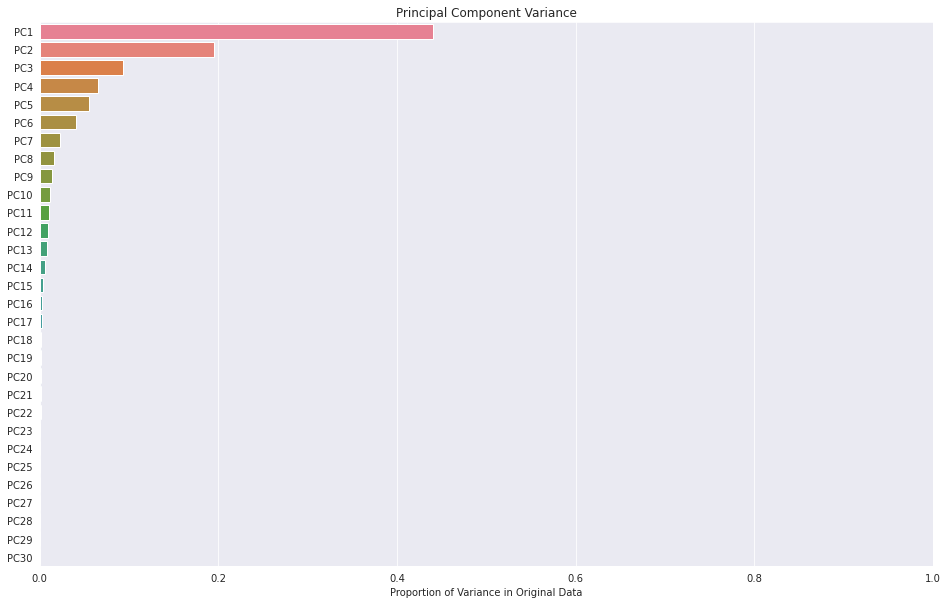

In [33]:
# Creating a visualisation of using Seaborne
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

As we can see on the visualisation, not all the Principal Components are valuable and there is very little proportion of variance above PC14. In the dimensionality reduction goal is to lower the number of components 'n_components' to retain the same accuracy as with using simple Logistic Regression model.
In our example n_components = 8 is the lowest minimal values that retains accuracy of LR model. 

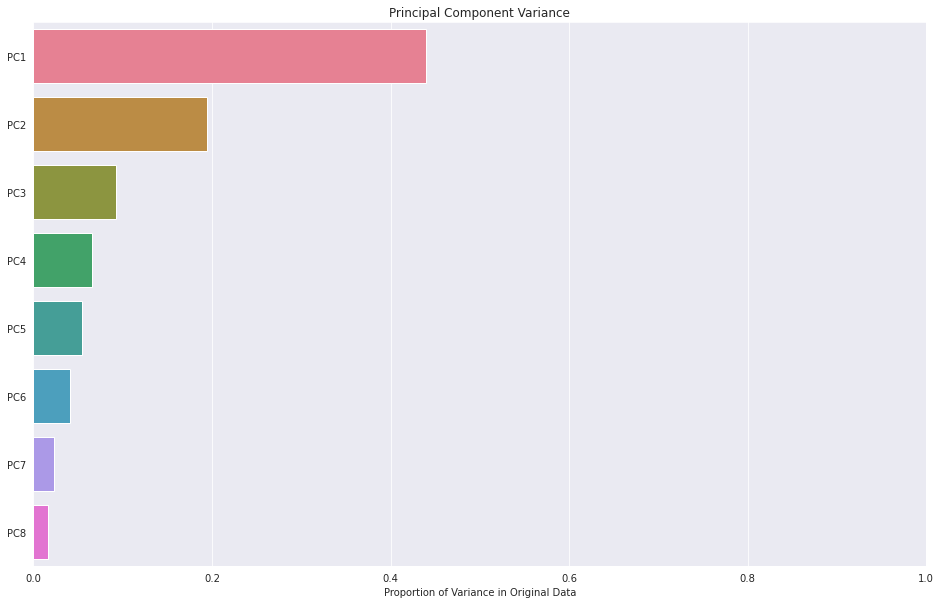

In [49]:
n_components = 8

pca = PCA(n_components=n_components)
pca.fit(X_train)

pc_train = pd.DataFrame(pca.transform(X_train), columns=["PC" + str(i + 1) for i in range(n_components)])
pc_test = pd.DataFrame(pca.transform(X_test), columns=["PC" + str(i + 1) for i in range(n_components)])

# Creating a visualisation of using Seaborne
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()


# Training/Results

Creating simple logistic regression for comparision with PCA and dimensionality reduction.

In [37]:
# On the original data
original_model = LogisticRegression()
original_model.fit(X_train, y_train)

print("Model Accuracy (Original Data): {:.5f}%".format(original_model.score(X_test, y_test) * 100))

Model Accuracy (Original Data): 99.41520%


In [54]:
# On the principal components
pca_model = LogisticRegression()
classification_model = pca_model.fit(pc_train, y_train)

print("Model Accuracy (PCA Data): {:.5f}%".format(pca_model.score(pc_test, y_test) * 100))

Model Accuracy (PCA Data): 99.41520%


Lets gain an insight how does model work on the test data after dimensionality reduction. 

In [60]:
# We are using predict method after PCA method.  
predicted_labels = classification_model.predict(pc_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_labels})

# Adding a column indicating if the prediction is correct
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']
print(results_df)

    Actual Predicted  Correct
333      B         B     True
273      B         B     True
201      M         M     True
178      B         B     True
85       M         M     True
..     ...       ...      ...
101      B         B     True
329      M         M     True
42       M         M     True
432      M         M     True
41       M         M     True

[171 rows x 3 columns]
    Actual Predicted  Correct
297      M         B    False


In [62]:
# Checking for incorrect predictions
incorrect_predictions = results_df[results_df['Correct'] == False]
print(incorrect_predictions)

    Actual Predicted  Correct
297      M         B    False


* Credits to: Gabriel Atkin (original PCA Analysis) 